In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [5]:
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')

df.head(1)

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_34856/3769942506.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.24931,"(39.16500483, -77.24931)"


In [3]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
df.shape

(172105, 43)

### 1.	Crash Hotspots: Use latitude and longitude data to identify areas with high frequencies of crashes.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


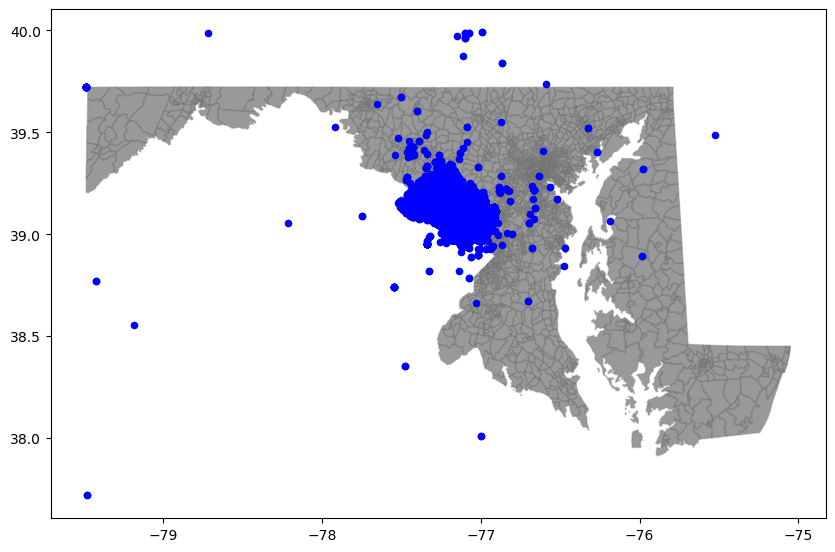

In [12]:

# Load the Maryland state boundaries
md_boundaries = gpd.read_file('../data/cb_2018_24_bg_500k/cb_2018_24_bg_500k.shp')

# Create a geometry column from the lat and lon columns
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame from the geometry
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10,10))
md_boundaries.plot(ax=ax, alpha=0.4, color='black', edgecolor='grey', label='Maryland')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Crash')
plt.show()

In [ ]:
# more 